# Periodogram viewer for HOYS lightcurves

* ***Shift + Enter on a code cell to run it and advance to the next cell.***

* ***If changing sliders, rerun the code block below the sliders***

* ***Plot windows are interactive, can use mouse to select and zoom into ranges***

### Install required packages, this needs to be done each time the binder page is reloaded

In [1]:
#load required modules
#online viewer binder requires the install commands for first run, ignore erros if running locally
!pip install pandas
!pip install astropy
!pip install plotly
!pip install ipywidgets
import os
import pandas as pd
import astropy
import numpy
import math
from astropy.time import Time
from astropy.timeseries import LombScargle
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display,clear_output

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/Users/jcampbellwhite001/Library/Python/3.7/lib'
Check the permissions.

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/Users/jcampbellwhite001/Library/Python/3.7/lib'
Check the permissions.

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/Users/jcampbellwhite001/Library/Python/3.7/lib'
Check the permissions.

You shou

### List available lightcurve data and select from dropdown list
* If data has been uploaded to the binder notebook main page, this may need refreshing

In [2]:
#read HOYS csv file
#lc_folder = "/content/drive/My Drive/HOYS_Colab/HOYS_period/light_curve_csv_files/"
lc_folder = "./light_curve_csv_files/"
star_list=os.listdir(lc_folder)

lc_select = widgets.Dropdown(
    options=sorted(star_list),
    description='Select a light curve file:',
)
display(lc_select)



Dropdown(description='Select a light curve file:', options=('.DS_Store', 'Icon\r', 'lightcurve_LkHa146.txt', '…

### Display head and tail of csv file containing all of the data

In [3]:
lc_data = pd.read_csv(os.path.join(lc_folder,lc_select.value),comment='#',delimiter=' ')
#view file head and tail
lc_data

id  calibrated_magnitude  calibrated_error  magnitude_rms_error  \
0     157901959               15.9468          0.072742               0.0258   
1      68911857               14.3734          0.114608               0.0107   
2       9712719               16.3896          0.090909               0.0133   
3      69518711               14.0960          0.058415               0.0315   
4      82546481               14.5852          0.053607               0.0093   
...         ...                   ...               ...                  ...   
4685   73171336               18.1260          0.154783               0.1881   
4686   66751098              -99.3000          0.000000             -99.0000   
4687  145854888               16.2533          0.197534               0.0353   
4688   60650715               14.7058          0.034175               0.0046   
4689  145857294               18.2809          0.168743               0.0809   

                x            y  alpha_j2000  delta_j2000  fwhm_world  flags  \
0     2109.906006  1625.750732   312.755689    44.260768    0.003400    0.0   
1      726.341125   962.783325   312.756257    44.260777    0.004735    0.0   
2     1925.137207  2513.876953   312.757468    44.260779    0.000891    3.0   
3      274.660004   380.768188   312.756940    44.260781    0.003053    0.0   
4     2103.738525  1601.775269   312.756380    44.260781    0.000834    3.0   
...           ...          ...          ...          ...         ...    ...   
4685   997.796570   684.403320   312.756958    44.262391    0.001195    0.0   
4686   505.185791     2.508300   312.756545    44.262412    0.004569  283.0   
4687  2637.276611  2156.505371   312.756633    44.262426    0.001426    2.0   
4688  2019.585815  2487.909668   312.756043    44.262428    0.000837    3.0   
4689  2639.589844  2156.525146   312.757134    44.262428    0.001362    0.0   

      magnitude  observation_id filter original_filter          date  user_id  \
0       15.7621           23915      V          Visual  2.458877e+06        7   
1       13.3676            6571      I            -SI-  2.458370e+06       33   
2       15.6094             771      R             Red  2.457615e+06        7   
3       15.0650            6807      I          I BAND  2.458373e+06       35   
4       15.6960            8360      I          I-Band  2.458437e+06        7   
...         ...             ...    ...             ...           ...      ...   
4685    17.6873            7338      B               B  2.458366e+06       41   
4686   -99.0000            5763      V               V  2.458347e+06       10   
4687    14.9249           16116      V           Green  2.458776e+06       54   
4688    15.1609            4648      I          I-Band  2.458316e+06        7   
4689    16.4140           16117      B            Blue  2.458776e+06       54   

      device_id                          target  fits_id  
0             2  [118] IC5070_incl_201_V2492Cyg    25838  
1            56  [118] IC5070_incl_201_V2492Cyg     6460  
2             2  [118] IC5070_incl_201_V2492Cyg      717  
3            41  [118] IC5070_incl_201_V2492Cyg     6675  
4             2  [118] IC5070_incl_201_V2492Cyg     8184  
...         ...                             ...      ...  
4685         51  [118] IC5070_incl_201_V2492Cyg     7273  
4686          8  [118] IC5070_incl_201_V2492Cyg     5541  
4687        127  [118] IC5070_incl_201_V2492Cyg    18481  
4688          2  [118] IC5070_incl_201_V2492Cyg     4486  
4689        127  [118] IC5070_incl_201_V2492Cyg    18482  

[4690 rows x 19 columns]

In [4]:
filter_list=numpy.unique(lc_data['filter'])

filter_select = widgets.Dropdown(
    options=sorted(filter_list),
    value='V',
    description='Select a filter',
)
display(filter_select)

date_range_sel=widgets.FloatRangeSlider(
    value=[min(lc_data['date']),max(lc_data['date'])],
    min=min(lc_data['date']),
    max=max(lc_data['date']),
    step=0.1,
    description='Date range [jd]:',
    readout_format='.1f',
    layout={'width': '600px'},
    style = {'description_width': 'initial'}

)

display(date_range_sel)

cal_error_sel=widgets.FloatSlider(
    value=0.25,
    min=0.1,
    max=0.4,
    step=0.01,
    description='Calibrated error:',
    layout={'width': '600px'},
    style = {'description_width': 'initial'}
)

display(cal_error_sel)

med_window_sel=widgets.IntSlider(
    value=50,
    min=10,
    max=365,
    step=5,
    description='Median filter window [days]:',
    layout={'width': '600px'},
    style = {'description_width': 'initial'}
)

display(med_window_sel)




Dropdown(description='Select a filter', index=5, options=('B', 'HA', 'I', 'R', 'U', 'V'), value='V')

FloatRangeSlider(value=(2457252.85122552, 2459065.42673611), description='Date range [jd]:', layout=Layout(wid…

FloatSlider(value=0.25, description='Calibrated error:', layout=Layout(width='600px'), max=0.4, min=0.1, step=…

IntSlider(value=50, description='Median filter window [days]:', layout=Layout(width='600px'), max=365, min=10,…

### Select desired filter and use sliders to refine data

In [5]:
#select data from specifed filter and remove bad data
band=filter_select.value
cal_error=cal_error_sel.value
med_window=med_window_sel.value
date_range=date_range_sel.value

i_data=lc_data[(lc_data['filter']==band) & (lc_data['flags'] <= 4) & (lc_data['calibrated_error'] < cal_error) & (lc_data['date'] > date_range[0]) & (lc_data['date'] < date_range[1]) & (lc_data['calibrated_magnitude'] > 0.0) & (lc_data['calibrated_error'] > 0.0) & (lc_data['fwhm_world'] > 0.0) & (lc_data['fwhm_world'] < 9.0/3600.0)]


#median filter the lightcurve over a time window
window = med_window #half the time window in days
mags = numpy.array(i_data['calibrated_magnitude'])
times = numpy.array(i_data['date'])
med = numpy.zeros(len(i_data))
for i in range(0,len(med)):
    check = numpy.where( numpy.abs(times[i] - times) < window )
    if (len(check[0]) > 0):
        med[i] = numpy.median(mags[check[0]])
filtered_mag=pd.Series(i_data['calibrated_magnitude'] - med + numpy.median(i_data['calibrated_magnitude']),name='filtered_mag')
i_data=pd.concat([i_data,filtered_mag],axis=1)

mag_range_sel=widgets.FloatRangeSlider(
    min=min(i_data['filtered_mag']),
    max=max(i_data['filtered_mag']),
    step=0.01,
    value=[min(i_data['filtered_mag']),max(i_data['filtered_mag'])],
    layout={'width': '600px'},
    description='Magnitude range [mag]',
    style = {'description_width': 'initial'}

)

display(mag_range_sel)

FloatRangeSlider(value=(15.36215, 17.65765), description='Magnitude range [mag]', layout=Layout(width='600px')…

### Select magnitude range, and plot lightcurve below, if changing magnitude range, rerun lightcurve plot below

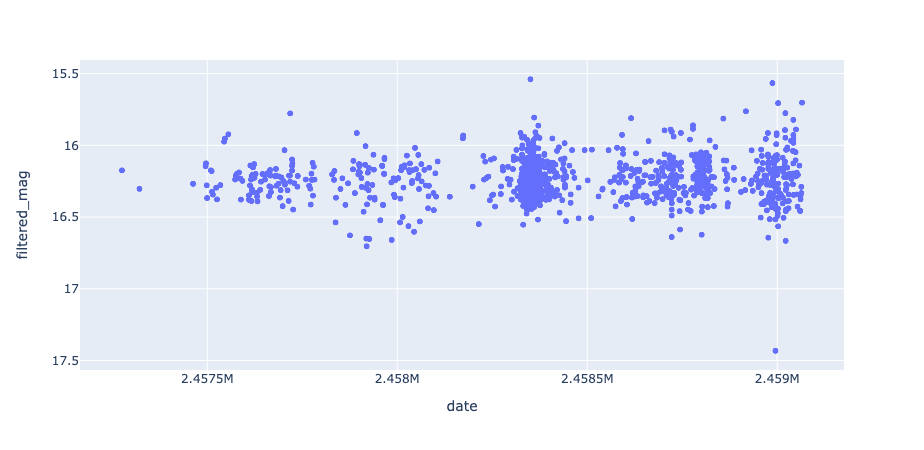

In [6]:
mag_range=mag_range_sel.value
mag_data=i_data[(i_data['filtered_mag'] > mag_range[0]) & (i_data['filtered_mag'] < mag_range[1])]

#plot lightcurve
fig1=px.scatter(mag_data,x=mag_data.date,y=mag_data.filtered_mag)
fig1['layout']['yaxis']['autorange'] = "reversed"
iplot(fig1)

### Plot the periodogram and determine the best period

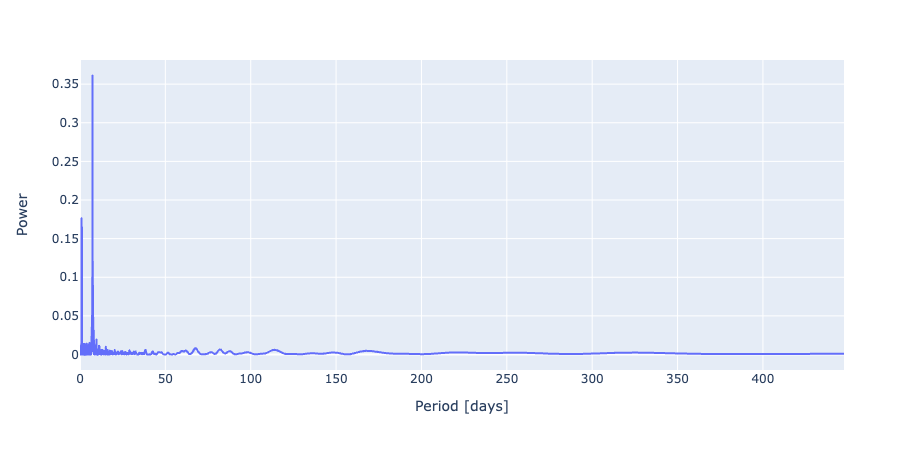

best period: 7.36307 days


In [7]:
#generate and plot periodogram
#jd=Time(i_data.date,format='jd') #was using the astropy time units for the date
jd=mag_data.date
ls=LombScargle(jd,mag_data.filtered_mag)
frequency,power=ls.autopower()
fig2=px.line(x=1/frequency,y=power,labels={'x':'Period [days]','y':'Power'})
fig2.update_xaxes(range=[0, (max(jd)-min(jd))/4.]) #added max range for plot, change if a better range is more useful
iplot(fig2)
#best_period = 1/frequency[numpy.argmax(power[numpy.where(1./frequency < 1000.0)])]
best_period = 1/frequency[numpy.argmax(power)]
print('best period:',numpy.round(best_period,5),'days')

### Plot the phase folded light curve and use the sliders to fit the best periodic function


In [8]:
time = mag_data['date']
phase = numpy.zeros(len(time))

#determine start values for the paramers from the data
offset0 = numpy.median(mag_data['filtered_mag'])
amp0 = numpy.std(mag_data['filtered_mag']) * 1.414
period0 = best_period
#trying to add interactive sliders for the sine-function - needs period, amp, offset and phase0 to be variable
def view_image(period=period0, amp=amp0, offset=offset0, phase0=0.5):

    phase = numpy.mod( time/period , 1.0 )
    #add a fitted sine-function
    amp = amp
    phase0 = phase0
    offset= offset
    fit = offset + amp * numpy.sin(2.0*math.pi*(-phase0 + phase ))

    #create dataframe with the phase, magnitude and fit values
    #use append to expand the size of it all to include phase+1.0
    df_phase=pd.DataFrame({'phase':phase.append(phase+1.0), 'i_data':mag_data['filtered_mag'].append(mag_data['filtered_mag']), 'fit':fit.append(fit)})
    #melt the dataframe by phase as the id variable so that the data can be plot and coloured by whether it's the data or the fit
    df_melt = df_phase.melt(id_vars='phase', value_vars=['i_data', 'fit'],value_name='filtered_mag')

    fig4=px.scatter(df_melt,x='phase', y='filtered_mag',color='variable')
    fig4['layout']['yaxis']['autorange'] = "reversed"

    fig4.update_layout(
    autosize=False,
    width=1000,
    height=600,)

    iplot(fig4)

interact(view_image, period=widgets.FloatSlider(min=period0-0.05, max=period0+0.05,step= 0.0001,value=period0,layout={'width': '600px'},readout_format='.5f'), 
         amp=widgets.FloatSlider(min=0, max=amp0+0.3, step=0.001,value=amp0,layout={'width': '600px'}), 
         offset=widgets.FloatSlider(min=offset0-0.2,max=offset0+0.2,step=0.001,layout={'width': '600px'},value=offset0,readout_format='.3f'), 
         phase0=widgets.FloatSlider(min=0,max=1,step=0.01,value=0.5,layout={'width': '600px'}))


interactive(children=(FloatSlider(value=7.363071336651529, description='period', layout=Layout(width='600px'),…

<function __main__.view_image(period=7.363071336651529, amp=0.19680669649144572, offset=16.238374999999998, phase0=0.5)>